<a href="https://colab.research.google.com/github/Manuelhrokr/MachineLearningI/blob/master/clasificando_imagenes_MZL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Machine Learning I
### Homework IV: Convolutional Neural Networks (ConvNets)
### Professors: Lara Lloret Iglesias
### Student: Manuel Zamudio López

In [0]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# Utilizando convnets con datasets pequeños

Lo primero que tienes que hacer es descargarte el dataset de https://lara.web.cern.ch/lara/train.zip en la terminal de Jupyter y descomprimirlo en la misma carpeta donde se encuentra esta libreta. 

Para descargar otro conjunto de datos desde imagenet se puede descargar la lista con las URL a las imágenes y usar `wget -i`



## Entrenando desde 0 una convNet

Entrenar un modelo de clasificación de imágenes con muy pocos datos es una situación común en la que te encontrarás si acabas dedicándote a hacer Computer Vision en un contexto profesional. 

Tener "pocas" muestras puede significar cualquier cosa entre unos pocos cientos y unas pocas decenas de miles de imágenes. Vamos a ilustrar aqui un ejemplo práctico: vamos a centrarnos en clasificar imágenes como "perros" y "gatos".


## La relevancia del Deep Learning en problemas con pocos datos

Quizás habrás oido muchas veces que el Deep Learning solo funciona cuando se tienen grandes cantidades de datos. Esto en parte es verdad: una de las características del Deep learning es que puede encontrar características interesantes a partir del dataset de entrenamiento por si mismo, y esto a priori es más sencillo cuando se tienen muchos ejemplos disponibles, especialmente en el caso de tener datasets de input con una alta dimensionalidad, como es el caso de las imágenes.

Sin embargo, lo que constituye un dataset "grande" es relativo. Concretamente relativo al tamaño y la profundidad de la red que estamos intentando entrenar. No es posible enrenar una convnet para que resulta un problema completo con solo unas decenas de ejemplos, pero unos pocos cientos puede ser suficiente si el modelo está bien montado (entenderemos que significa bien "montado" a lo largo del curso de Deep Learning).

Como las convnets aprenden características locales, invariantes bajo translaciones, son muy eficientes en cuanto al número de imágenes necesarias para llevar a cabo problemas perceptuales. Así que entrenar una convnet desde 0 con un dataset no muy grande aún nos puede llevar a resultados razonables como veremos aqui.

Pero hay más aún: los modelos de Deep Learning son altamente "reciclables". Uno puede coger, por ejemplo, un problema de clasificación de imagen y un convertidor de voz a texto entrenado sobre un dataset muy grande y luego reutilizarlo para resolver otro problema completamente distinto solo añadiéndole pequeñas modificaciones. Más especificamente, en el caso de Computer Vision, muchos modelos pre-entrenados (normalmente entrenados en el dataset ImageNet) son hechos publicos para que uno pueda descargarlos y utilizarlos para crear potentes modelos de Computer Vision con muy pocos datos. 

Pero aqui nos vamos a limitar a correr un ejemplo sencillito. 


## Los datos

El dataset de gatos vs perros que utilizamos no es un paquete de Keras. Se publicó en Kaggle.com como parte de un problema de Computer Vision a finales de 2013, cuando todavía las ConvNets no eran tan populares. 

Las imágenes son JPGEs de resolución media. Tiene este aspecto:

![cats_vs_dogs_samples](https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg)

No es ninguna sorpresa que la competición de gatos vs perros de Kaggle en 2013 fuera ganada por ConvNets. Los mejores pudieron alcanzar una precisión de hasta 95%. En nuestro ejemplo vamos a quedarnos todavía lejos de esta precisión, pero durante el curso de Deep Learning hemos aprendido como acercarnos a este valor utilizando diversos métodos para mejorar el rendimiento de las redes neuronales. Hay que tener en cuenta que en este ejemplo estamos entrenando aproximadamente sobre solo el 10% de los datos que se utilizaron para el concurso. 
Después de descargar el dataset y descomprimirlo, vamos a crear un nuevo dataset que contiene tres subsets: un set de training que contiene 1000 imágenes de cada clase, un set de validación con 500 imágenes de cada clase, y finalmente un set de test con 500 imágenes de cada clase.

Aqui tenemos unas cuantas líneas de código que nos hacen este reparto automáticamente:



## La parte complicada: Cargar el Dataset en Colaboratory. Afortunadamente, el manejo para saber dónde se iban guardando las carpetas descargadas, es similar al de la Terminal en Linux.  

In [8]:
cd /tmp

/tmp


In [0]:
ls

In [0]:
rm -r train.zip

In [0]:
ls

In [0]:
rm train.zip

In [0]:
rm -r test train validation

In [37]:
cd /tmp

/tmp


In [14]:
!wget "https://lara.web.cern.ch/lara/train.zip"

--2019-04-19 16:45:57--  https://lara.web.cern.ch/lara/train.zip
Resolving lara.web.cern.ch (lara.web.cern.ch)... 188.184.64.89, 2001:1458:201:a4::100:53
Connecting to lara.web.cern.ch (lara.web.cern.ch)|188.184.64.89|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 569546721 (543M) [application/zip]
Saving to: ‘train.zip’

train.zip           100%[===================>] 543.16M  21.6MB/s    in 25s     

2019-04-19 16:46:23 (21.4 MB/s) - ‘train.zip’ saved [569546721/569546721]



In [15]:
ls

train.zip


In [0]:
!unzip train.zip

In [17]:
ls

train/  train.zip


In [18]:
cd train

/tmp/train


In [0]:
ls

In [0]:
import os, shutil

In [21]:
pwd

'/tmp/train'

In [0]:
original_dataset_dir = '/tmp/train'
base_dir = '/tmp/catdog'
os.mkdir(base_dir)

In [0]:
# Directories for our training, validation and test splits
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

In [0]:
# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# Directory with our test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# Directory with our test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [25]:
cd /tmp/catdog

/tmp/catdog


In [26]:
pwd

'/tmp/catdog'

In [0]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

As a sanity check, let's count how many pictures we have in each training split (train/validation/test):

In [28]:
print('total training cat images:', len(os.listdir(train_cats_dir)))

total training cat images: 1000


In [29]:
print('total training dog images:', len(os.listdir(train_dogs_dir)))

total training dog images: 1000


In [30]:
print('total validation cat images:', len(os.listdir(validation_cats_dir)))

total validation cat images: 500


In [31]:
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))

total validation dog images: 500


In [32]:
print('total test cat images:', len(os.listdir(test_cats_dir)))

total test cat images: 500


In [33]:
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total test dog images: 500



Así que efectivamente tenemos 2000 imágenes de entrenamiento, 1000 imágenes de validación y 1000 imágenes de test. En cada uno de estos subsets hay el mismo número de ejemplos de cada clase: esto es lo que se llama un sistema de clasificación binario balanceado, lo cual significa que nuestra precisión de clasificación será una métrica adecuada del éxito de nuestra solución.

## Construyendo nuestra red

En el anterior ejemplo hemos construido una pequeña convnet para resolver el problema de clasificar números escritos a mano usando el dataset MNIST, así que ya estamos familiarizados con la terminología que utiliza keras. Vamos a reutilizar la estructura general que teniamos en el ejemplo anterior: nuestra convnet tendra una pila de capas alternadas de `Conv2D` (con activación `relu` ) y capas  `MaxPooling2D`.

Sin embargo, como estamos tratando con imágenes mayores y un problema más complejo, vamos a crear nuestra red en consecuencia: tendrá una capa más de `Conv2D` + `MaxPooling2D`. Esto sirve para aumentar la capacidad de la red y para reducir aún más el tamaño de los mapas de características, para que no sean tan enormes cuando lleguen al paso de aplanado. Empezamos usando imágenes de input de 150x150 (una elección arbitraria), y acabaremos con mapas de características que tienen un tamaño de 7x7 antes de la capa de aplanamiento.

Es importante tener en cuenta que la profundidad de los mapas de características va creciendo progresivamente según se avanza en la red neuronales ( de 32 a 128) mientras que el tamaño de los mapas de características va disminuyendo (de 148x148 a 7x7). Este patrón lo verás en casi todas las convnets.

Como estamos atacando un problema de clasificación binaria (perro o gato), vamos a acabar la red con una única unidad (una capa densa de tamaño 1) y con una activación sigmoide. Esta unidad codificará la probabilidad de que nuestra red esté mirando a una clase o a otra.

El aspecto final del modelo debe de ser el siguiente:

![modelo_red_animales.png](https://github.com/laramaktub/MachineLearningI/blob/master/modelo_red_animales.png?raw=true)

In [0]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

In [35]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 15, 15, 128)       147584    
__________

Para el paso de compilación utilizaremos el optimizador `RMSprop`(lr=1e-4). Como nuestra red termina con una única unidad sigmoide, vamos a utilizar binary crossentropy como nuestra función de pérdida.

In [0]:
from keras import optimizers

model.compile(optimizer = optimizers.RMSprop(lr = 1e-4),
              loss = 'binary_crossentropy', 
              metrics=['acc'])

##  Preprocesado de datos

Las imágenes deben estar formateadas apropiadamente en tensores de flotantes antes de dárselas a la red. Esto es justo lo que vamos a hacer aqui. Antes de preprocesarlas las imágenes son archivos JPEG. Los pasos para poder darlos a nuestra red son a grandes rasgos:

* Leer los archivos con las imágenes.
* Decodificar el contenido del JPEG en una "parrilla" con el RGB de los pixels 
* Convertir esa "parrilla" en tensores de flotantes
* Re-escalar los valores de los pixels (enre 0 y 255) al intervalo [0, 1] ya que las redes neuronales prefieren trabajar con valores pequeños. 

Todo esto puede parecer muy complicado pero gracias a Keras nuestra vida es mucho más fácil y podemos contar con tus herramientas para ocuparse de estos pasos automaticamente. Keras tiene un módulo con herramientas para el tratamiento de imágenes, que se puede encontrar en  `keras.preprocessing.image`. En particular, contiene la clase `ImageDataGenerator` que nos permite automaticamente convertir imágenes que tengamos en el disco duro en tensores pre-procesados. Esto es justamente lo que usaremos a continuación. Para ello podemos utilizar el flow_from_directory para coger las imágenes directamente de las carpetas que generamos previamente. Le damos como entrada las carpetas donde están las imágenes de entrenamiento (o validación), el tamaño de las imágenes (target_size), tamaño del batch que vamos a usar (vamos a empezar por 20) y como solo hay dos categorías, le decimos que vamos a usar binary_crossentropy (class_mode). Al correr estos comandos obtendremos lo siguiente el número total de imágenes y cuantas clases hay.

In [37]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(1. / 255)
validation_datagen = ImageDataGenerator(1. / 255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 20,
                                                    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = (150, 150),
                                                              batch_size = 20,
                                                              class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Vamos a echar un vistazo a uno de estos generadores: nos lleva a un batch de 150x150 imágenes RGB (dimensiones `(20, 150, 150, 3)`) y etiquetas binarias (dimensión `(20,)`). 20 es el número de ejemplos en cada batch (lo que llamamos el tamaño del batch). El generador genera estos batches de manera indefinida: corre un bucle sin cesar por todas las imágenes que tengamos en la carpeta. Por eso tenemos que escribir `break` para romper el bucle en algún momento.


In [38]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Ahora vamos a hacer el fit. En este caso, como lo que tenemos es un generator, utilizamos fit_generator. Vamos a correr 30 épocas y a utilizar el dataset de validación.

### Obtuve los siguientes errores cuando corrí el modelo en Colaboratory por primera vez, por lo que tuve que especificar los parámetros solicitados.

* ValueError: `steps_per_epoch=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `steps_per_epoch` or use the `keras.utils.Sequence` class.

* ValueError: `validation_steps=None` is only valid for a generator based on the `keras.utils.Sequence` class. Please specify `validation_steps` or use the `keras.utils.Sequence` class.

In [44]:
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 30, 
                              validation_data = validation_generator,
                              validation_steps=50)

Epoch 1/30
  2/100 [..............................] - ETA: 9s - loss: 8.3698 - acc: 0.4750 

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 8s 85ms/step - loss: 7.8915 - acc: 0.5050 - val_loss: 7.9553 - val_acc: 0.5010
Epoch 2/30
100/100 [==============================] - 9s 94ms/step - loss: 8.0190 - acc: 0.4970 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 8s 81ms/step - loss: 7.9393 - acc: 0.5020 - val_loss: 7.9712 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 8s 81ms/step - loss: 8.0668 - acc: 0.4940 - val_loss: 8.0190 - val_acc: 0.4970
Epoch 5/30
100/100 [==============================] - 8s 81ms/step - loss: 7.8197 - acc: 0.5095 - val_loss: 7.9074 - val_acc: 0.5040
Epoch 6/30
100/100 [==============================] - 8s 81ms/step - loss: 7.9632 - acc: 0.5005 - val_loss: 7.9871 - val_acc: 0.4990
Epoch 7/30
100/100 [==============================] - 8s 81ms/step - loss: 8.0190 - acc: 0.4970 - val_loss: 8.0190 - val_acc: 0.4970
Epoch 8/30
100/100 [==============================] - 9s 92ms/step - loss: 7.963

## Plot accuracy vs epochs (Plot 1).

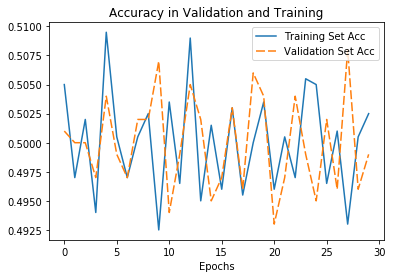

<Figure size 432x288 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label = 'Training Set Acc')
plt.plot(history.history['val_acc'], label = 'Validation Set Acc', dashes=[6, 2])
plt.title('Accuracy in Validation and Training')
plt.legend()
plt.xlabel('Epochs')
plt.figure()
plt.show()

In [0]:
model.save('dogcat_convnet.h5')

In [64]:
pwd

'/tmp/catdog'

Ahora evalua el modelo en el dataset de test.

In [65]:
from keras.models import load_model
model = load_model("dogcat_convnet.h5")
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/tmp/catdog', target_size=(150, 150), batch_size=20, class_mode='binary')
model.evaluate_generator(test_generator, steps = 2)

Found 4000 images belonging to 3 classes.


[0.3748156428337097, 0.5250000059604645]

Prueba a optimizar la red. Para ello puedes utilizar las herramientas utilizadas en clase. Puedes probar a optimizar en términos de velocidad y de accuracy. Comenta los resultados.

## Vamos a hacer un intento con 50 épocas y ver cómo se comporta el modelo. Además se incluye: *Data Augmentation* y *Dropout*


In [0]:
##dropout, data augmentation, optimizer type.

model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), 
                        activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, 
                       activation = 'relu'))
model.add(layers.Dense(1, 
                       activation = 'sigmoid'))


model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
              loss = 'binary_crossentropy', 
              metrics=['acc'])

In [80]:
train_datagen = ImageDataGenerator(
                     rescale = 1. /255,                 
                     rotation_range = 40,
                     width_shift_range = 0.2,
                     height_shift_range = 0.2,
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     horizontal_flip = True)
                     
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 30,
                                                    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = (150, 150),
                                                              batch_size = 30,
                                                              class_mode = 'binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 50, 
                              validation_data = validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 27s 269ms/step - loss: 0.6933 - acc: 0.5173 - val_loss: 5.5905 - val_acc: 0.5372
Epoch 2/50
100/100 [==============================] - 23s 227ms/step - loss: 0.6860 - acc: 0.5543 - val_loss: 5.7224 - val_acc: 0.6020
Epoch 3/50
100/100 [==============================] - 23s 228ms/step - loss: 0.6673 - acc: 0.5918 - val_loss: 6.0948 - val_acc: 0.5966
Epoch 4/50
100/100 [==============================] - 23s 226ms/step - loss: 0.6493 - acc: 0.6133 - val_loss: 6.4928 - val_acc: 0.5804
Epoch 5/50
100/100 [==============================] - 25s 255ms/step - loss: 0.6260 - acc: 0.6490 - val_loss: 6.6464 - val_acc: 0.5712
Epoch 6/50
100/100 [==============================] - 24s 237ms/step - loss: 0.6157 - acc: 0.6557 - val_loss: 7.2817 - val_acc: 0.5419
Epoch 7/50
100/100 [==============================] - 23s 228ms/step - loss: 0.6014 - acc: 0.6827 - val_loss: 6.0294 - val_acc: 0.6082
Epoch 8/50
100/100 [==============================] - 24s 243ms/st

## Plot accuracy vs epochs (Plot 2).

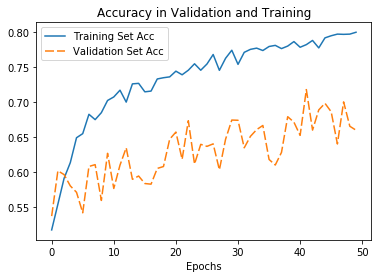

<Figure size 432x288 with 0 Axes>

In [81]:
plt.plot(history.history['acc'], label = 'Training Set Acc')
plt.plot(history.history['val_acc'], label = 'Validation Set Acc', dashes=[6, 2])
plt.title('Accuracy in Validation and Training')
plt.legend()
plt.xlabel('Epochs')
plt.figure()
plt.show()

## Haré un último intento con 90 épocas, ya que estoy cerca de la hora de entrega, pero confío en Google y su GPU prestada       :P     :D

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), 
                        activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(128, (3, 3), 
                        activation = 'relu'))

model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(512, 
                       activation = 'relu'))
model.add(layers.Dense(1, 
                       activation = 'sigmoid'))


model.compile(optimizer = optimizers.RMSprop(lr=1e-4),
              loss = 'binary_crossentropy', 
              metrics=['acc'])

In [83]:
train_datagen = ImageDataGenerator(
                     rescale = 1. /255,                 
                     rotation_range = 40,
                     width_shift_range = 0.2,
                     height_shift_range = 0.2,
                     shear_range = 0.2,
                     zoom_range = 0.2,
                     horizontal_flip = True)
                     
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size = (150, 150),
                                                    batch_size = 30,
                                                    class_mode = 'binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              target_size = (150, 150),
                                                              batch_size = 30,
                                                              class_mode = 'binary')
history = model.fit_generator(train_generator,
                              steps_per_epoch = 100,
                              epochs = 90, 
                              validation_data = validation_generator,
                              validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/90


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:699: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


100/100 [==============================] - 27s 275ms/step - loss: 0.6922 - acc: 0.5208 - val_loss: 5.6333 - val_acc: 0.5818
Epoch 2/90
100/100 [==============================] - 23s 227ms/step - loss: 0.6812 - acc: 0.5620 - val_loss: 7.4653 - val_acc: 0.5223
Epoch 3/90
100/100 [==============================] - 24s 244ms/step - loss: 0.6687 - acc: 0.5955 - val_loss: 7.9180 - val_acc: 0.5000
Epoch 4/90
100/100 [==============================] - 23s 229ms/step - loss: 0.6568 - acc: 0.6030 - val_loss: 6.3259 - val_acc: 0.5845
Epoch 5/90
100/100 [==============================] - 24s 240ms/step - loss: 0.6362 - acc: 0.6363 - val_loss: 7.2449 - val_acc: 0.5411
Epoch 6/90
100/100 [==============================] - 23s 228ms/step - loss: 0.6223 - acc: 0.6418 - val_loss: 7.1068 - val_acc: 0.5507
Epoch 7/90
100/100 [==============================] - 23s 227ms/step - loss: 0.6081 - acc: 0.6592 - val_loss: 6.5375 - val_acc: 0.5815
Epoch 8/90
100/100 [==============================] - 24s 241ms/st

## Plot accuracy vs epochs (Plot 3).

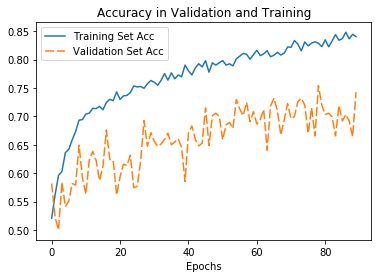

<Figure size 432x288 with 0 Axes>

In [84]:
plt.plot(history.history['acc'], label = 'Training Set Acc')
plt.plot(history.history['val_acc'], label = 'Validation Set Acc', dashes=[6, 2])
plt.title('Accuracy in Validation and Training')
plt.legend()
plt.xlabel('Epochs')
plt.figure()
plt.show()

## Conclusiones

Por cuestiones de tiempo no he podido implementar el modelo con un dataset de imágenes distinto al de clasificación de *perros* y *gatos*. Sin embargo, por lo mismo, invertí buena parte de mi día en ver cómo correr el modelo haciendo uso de la GPU de **Colaboratory** de **Google**. Lo complicado fue leer el dataset de imágenes y procesarlo exactamente igual a como se nos indicó en la práctica, ya que:

* Es un dataset pesado $\approx$ 550 MB 
* Tuve que guardarlo en mi carpeta de archivos Temporales, porque hice muchos intentos de descargarlo, descompromirlo, leer y separar las carpetas en Train, Validation y Test.

Por otro lado, me impresionó mucho la mejora en el modelo tras cierta parametrización (**dropout** y **data augmentation**). Keras tiene muchísima información en Internet (Google, Medium, StackOverflow, etc) sobre cómo parametrizar. Pero la radical diferencia se observa en el primer modelo, donde obtuve un Accuracy (promedio) de $\approx 50$% (Train y Validation) contra los modelos con el setting de los parámetros antes mencionados. Por ejemplo, el segundo modelo, con **50 épocas**,  logró un Accuracy de $\approx 65$ % en el Validation vs $\approx$ 80% en el Training.

Para el caso del tercer modelo, donde aumenté a **90 épocas**,  logró un Accuracy de $\approx XX$ % en el Validation vs $\approx XX$ en el Training.

Definitivamente seguiré experimentando, porque me gustaría ver cómo se comporta el modelo con los otros optimizadores de Keras (https://keras.io/optimizers/). Y probablemente lo ponga a prueba con otros datasets, para ver su capacidad de generalización.

## Summary (ver Plots en todos los casos)

* Modelo 1: 30 épocas, no data augmentation ni dropout. 
   * Accuracy promedio en Train $\approx$50%
   * Accuracy promedio en Validation $\approx$50%
 
 
 * Modelo 2: 50 épocas, con data augmentation y dropout. 
   * Accuracy en Train $\approx$80%
   * Accuracy promedio en Validation $\approx$60%

 * Modelo 3: 90 épocas, con data augmentation y dropout. 
   * Accuracy en Train $\approx$85%
   * Accuracy promedio en Validation $\approx$70%
   
   

In [0]:
#import os, signal
#os.kill(os.getpid(), signal.SIGKILL)